# Python Cinema: Analyzing Movies using EDA Techniques

## Importing libaries

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

## Reading in the file

In [258]:
df = pd.read_csv('movies.csv')

## Exploratory Data Analysis (EDA)

### Dataset Overview

In [259]:
# Getting a first look at data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [260]:
#Getting a description of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [261]:
# Display statistical summary of the dataset
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [262]:
# Check for missing values
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [263]:
#checking for percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
name,0.000000
rating,1.004173
genre,0.000000
year,0.000000
released,0.026082
score,0.039124
votes,0.039124
director,0.000000
writer,0.039124
star,0.013041


In [264]:
# Check for duplicate values
df.duplicated().sum()

0

### Data Cleaning and Preprocessing
- If there are any missing values or inconsistencies in the dataset, we need to clean and preprocess the data before proceeding with the analysis.

In [265]:
#Dropping the null values
df.dropna(inplace=True)

#Resetting index
df.reset_index(inplace=True)

In [266]:
#converting columnn types from float to integer
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

***Note*** : To make sure there is no dissimilarity between released year and country of release, we will breakdown the released column
    into 3 different columns named year, country and date and drop the existing ones

In [267]:
#splitting up the released column to get date and country
df[['released_date', 'released_country']] = df['released'].str.split('(', expand=True)

#deleting relesed country
del df['released_country']

#splitting up the released date colunm into date and year
df[['corect_date', 'correct_year']] = df['released_date'].str.split(',', expand=True)

#changing year type to numeric
df['correct_year'] = pd.to_numeric(df['correct_year'])

#dropping unnecessary column
df.drop(columns=['released', 'year', 'released_date'], inplace=True)

#renaming country column


del df['index']

df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,corect_date,correct_year
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,June 13,1980.0
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,July 2,1980.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,June 20,1980.0
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,July 2,1980.0
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,July 25,1980.0


### Correlation Analysis

In [268]:
#correlation of numeric values
df.corr()

,score,votes,budget,gross,runtime,correct_year
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061443
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.202215
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.319669
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268141
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075183
correct_year,0.061443,0.202215,0.319669,0.268141,0.075183,1.000000


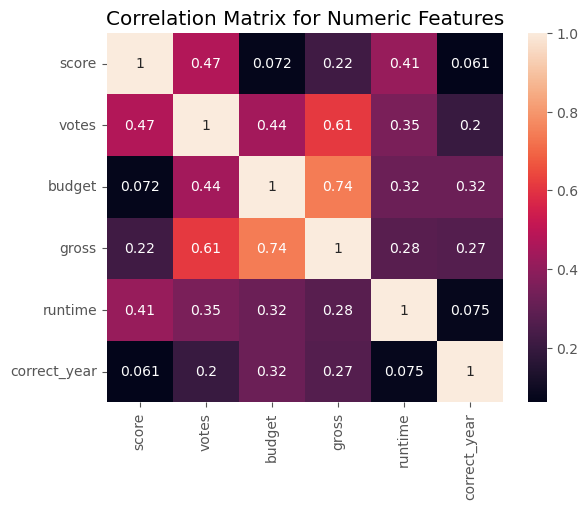

In [269]:
#Visualizing correlation of numeric values
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

Text(0, 0.5, 'Gross earning of the movie')

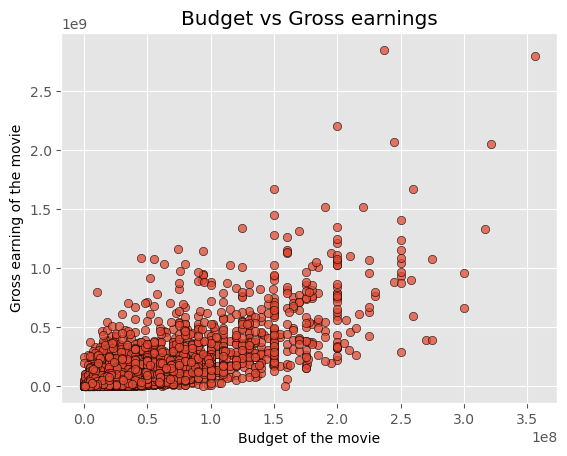

In [270]:
#plotting budget and gross
plt.scatter(x= df['budget'], y= df['gross'], alpha=0.75, edgecolors='black', linewidths=0.5)
plt.title('Budget vs Gross earnings')
plt.xlabel(('Budget of the movie'))
plt.ylabel(('Gross earning of the movie'))

Text(0, 0.5, 'Gross earning of the movie')

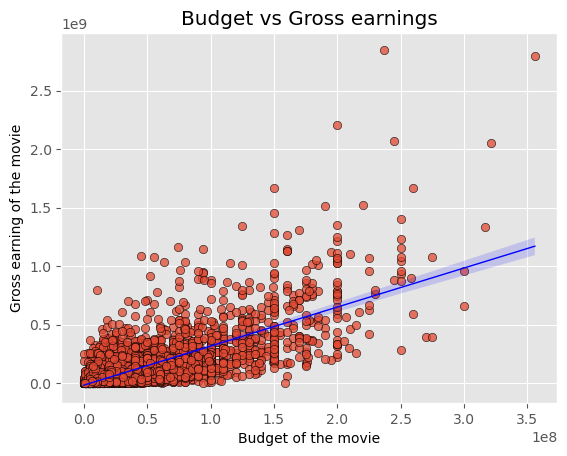

In [271]:
#plot budget vs gross using seaborn
sns.regplot(x= 'budget', y= 'gross', data=df, line_kws= {'color': 'blue', 'linewidth' : '1'}, scatter_kws=
            {'alpha' : 0.75, 'edgecolors' : 'black', 'linewidths' : 0.5})
plt.title('Budget vs Gross earnings')
plt.xlabel(('Budget of the movie'))
plt.ylabel(('Gross earning of the movie'))

Text(0, 0.5, 'Gross earning of the movie')

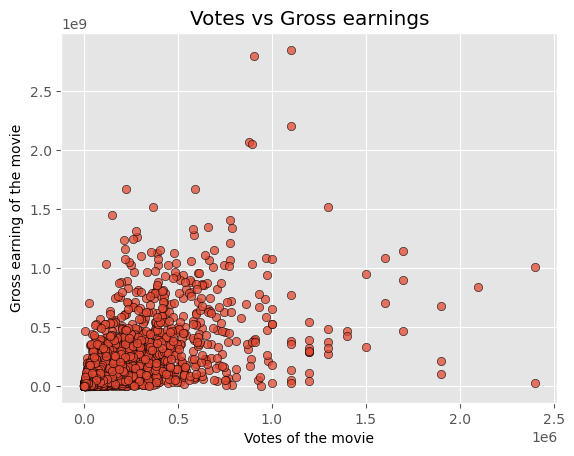

In [272]:
#Ploting votes and gross
plt.scatter(x= df['votes'], y= df['gross'], alpha=0.75, edgecolors='black', linewidths=0.5)
plt.title('Votes vs Gross earnings')
plt.xlabel(('Votes of the movie'))
plt.ylabel(('Gross earning of the movie'))

Text(0, 0.5, 'Gross earning of the movie')

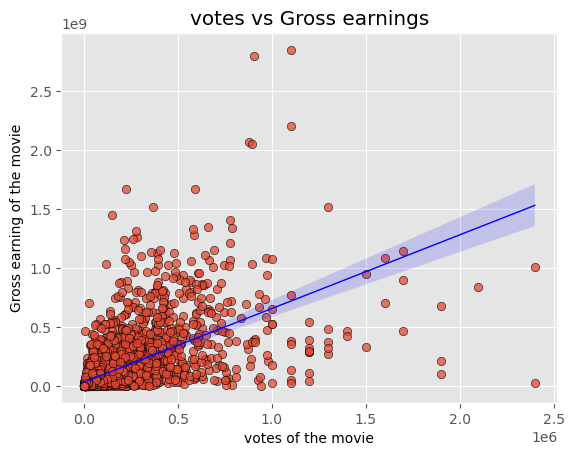

In [273]:
#plot votes vs gross using seaborn
sns.regplot(x= 'votes', y= 'gross', data=df, line_kws= {'color': 'blue',  'linewidth' : '1'}, scatter_kws=
            {'alpha' : 0.75, 'edgecolors' : 'black', 'linewidths' : 0.5})
plt.title('votes vs Gross earnings')
plt.xlabel(('votes of the movie'))
plt.ylabel(('Gross earning of the movie'))

Text(0, 0.5, 'Score of the movie')

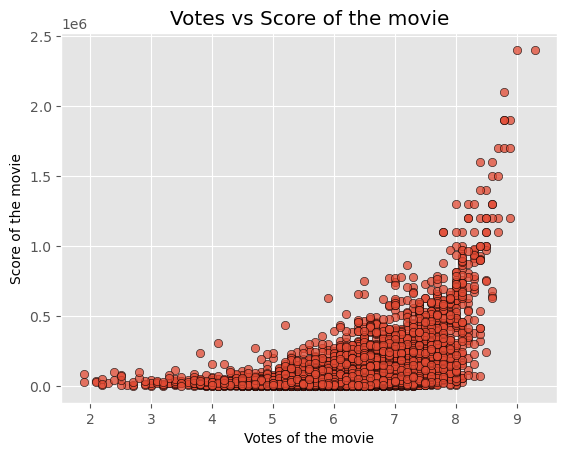

In [274]:
#Plotting votes vs score
plt.scatter(y= df['votes'], x= df['score'], alpha=0.75, edgecolors='black', linewidths=0.5)
plt.title('Votes vs Score of the movie')
plt.xlabel(('Votes of the movie'))
plt.ylabel(('Score of the movie'))

Text(0, 0.5, 'Score of the movie')

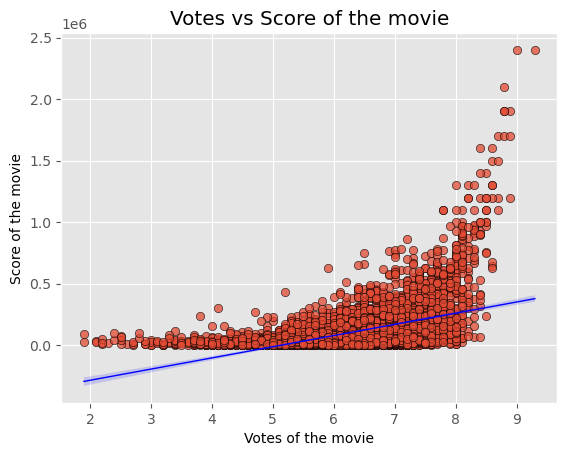

In [275]:
#plot votes vs gross using seaborn
sns.regplot(y= 'votes', x= 'score', data=df, line_kws= {'color': 'blue',  'linewidth' : '1'}, scatter_kws=
            {'alpha' : 0.75, 'edgecolors' : 'black', 'linewidths' : 0.5})
plt.title('Votes vs Score of the movie')
plt.xlabel(('Votes of the movie'))
plt.ylabel(('Score of the movie'))

In [276]:
#converting all columns to numeric
df_numeric = df.copy()
for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name] =df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes

df_numeric

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,corect_date,correct_year
0,4692,6,6,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,193,1980.0
1,3929,6,1,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,169,1980.0
2,3641,4,0,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,201,1980.0
3,204,4,4,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,169,1980.0
4,732,6,4,7.3,108000,719,351,271,47,6000000,39846344,1083,98,175,1980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,415,6,0,6.6,140000,16,2390,1812,47,90000000,426505244,452,124,134,2020.0
5417,3556,4,0,6.5,102000,852,2309,147,47,85000000,319715683,1108,99,102,2020.0
5418,1153,4,1,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101,134,2020.0
5419,3978,4,1,6.8,42000,294,2091,640,6,135000000,111105497,12,100,110,2020.0


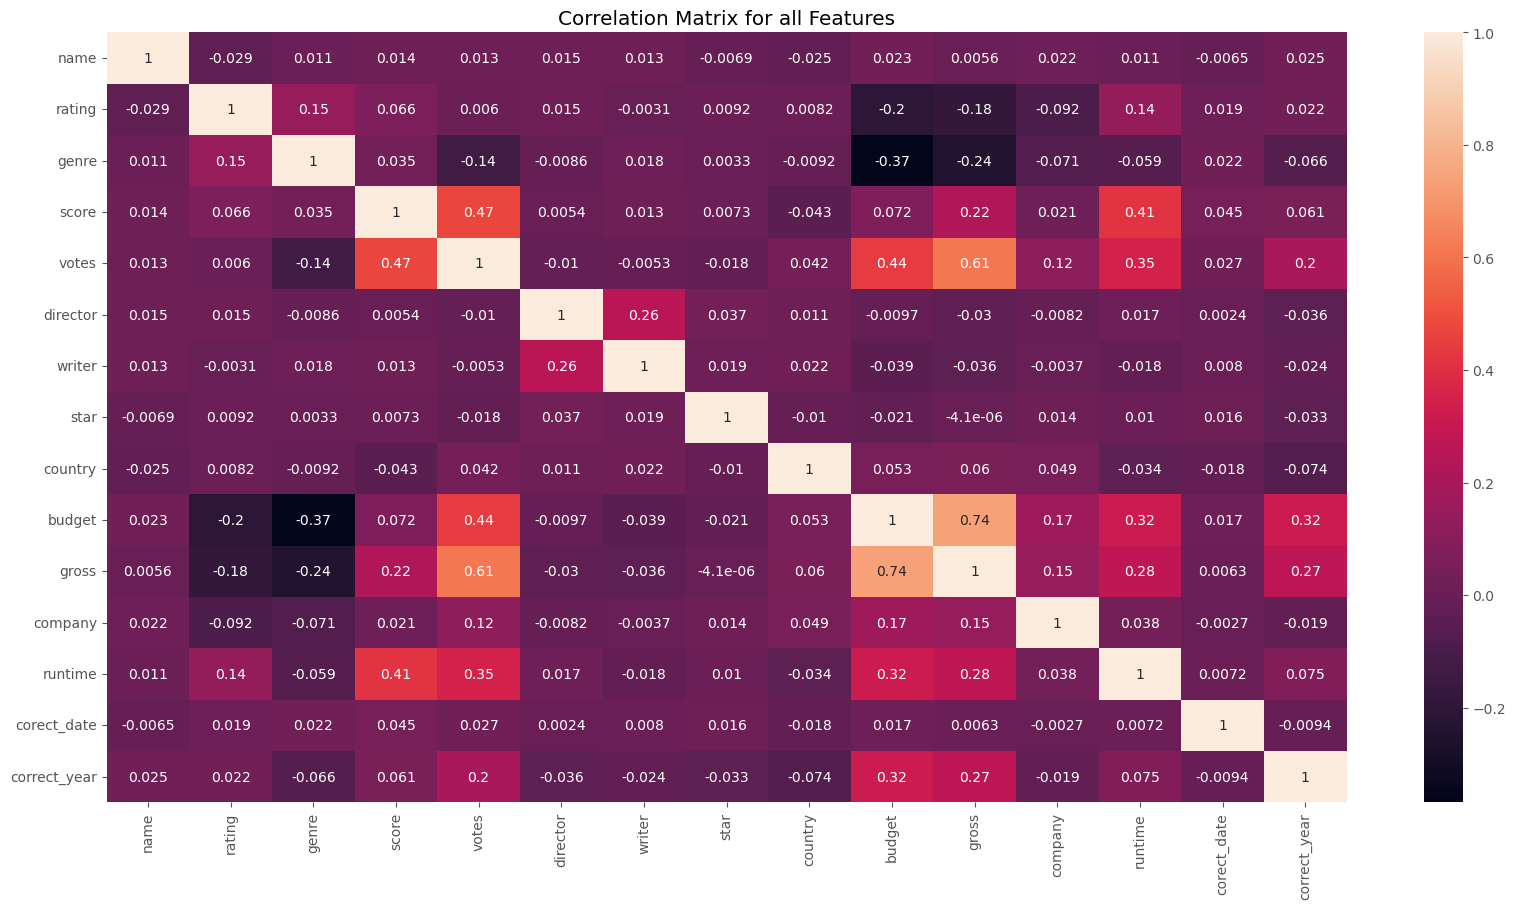

In [277]:
#visualisazing correlation
sns.heatmap(df_numeric.corr(), annot=True)
plt.title('Correlation Matrix for all Features')
plt.gcf().set_size_inches(20, 10)

### Feature Engineering

In [278]:
#getting profit for each movie
df['profit'] = df['gross'] - df['budget']
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,corect_date,correct_year,profit
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,June 13,1980.0,27998772
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,July 2,1980.0,54353106
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,June 20,1980.0,520375067
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,July 2,1980.0,79953539
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,July 25,1980.0,33846344


In [279]:
#checking column type
df['profit'].dtype

dtype('int64')

In [280]:
#getting a look at movies that are in loss
df.sort_values(by='profit').head(10)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,corect_date,correct_year,profit
5321,The Irishman,R,Biography,7.8,344000,Martin Scorsese,Steven Zaillian,Robert De Niro,United States,159000000,968853,Tribeca Productions,209,November 27,2019.0,-158031147
2130,The 13th Warrior,R,Action,6.6,119000,John McTiernan,Michael Crichton,Antonio Banderas,United States,160000000,61698899,Touchstone Pictures,102,August 27,1999.0,-98301101
2733,The Adventures of Pluto Nash,PG-13,Action,3.8,25000,Ron Underwood,Neil Cuthbert,Eddie Murphy,United States,100000000,7103973,Castle Rock Entertainment,95,August 16,2002.0,-92896027
4213,Jin ling shi san chai,R,Drama,7.6,51000,Yimou Zhang,Heng Liu,Christian Bale,China,94000000,2855644,Beijing New Picture Film,146,December 16,2011.0,-91144356
1560,Cutthroat Island,PG-13,Action,5.7,27000,Renny Harlin,Michael Frost Beckner,Geena Davis,France,98000000,10017322,Beckner/Gorman Productions,124,December 22,1995.0,-87982678
4975,Live by Night,R,Action,6.4,54000,Ben Affleck,Ben Affleck,Ben Affleck,United States,108000000,22678555,Appian Way,129,January 13,2017.0,-85321445
3022,The Alamo,PG-13,Drama,6.0,20000,John Lee Hancock,Leslie Bohem,Dennis Quaid,United States,107000000,25819961,Touchstone Pictures,137,April 9,2004.0,-81180039
2349,Supernova,PG-13,Horror,4.9,17000,Walter Hill,William Malone,James Spader,United States,90000000,14828081,Hammerhead Productions,90,January 14,2000.0,-75171919
5401,Missing Link,PG,Animation,6.7,23000,Chris Butler,Chris Butler,Hugh Jackman,Canada,100000000,26565710,Annapurna Pictures,93,April 12,2019.0,-73434290
3997,How Do You Know,PG-13,Comedy,5.4,48000,James L. Brooks,James L. Brooks,Reese Witherspoon,United States,120000000,48668907,Columbia Pictures,121,December 17,2010.0,-71331093


In [281]:
#checking how many movies are in loss
(df['profit'] < 0).sum()

1744

In [282]:
#percentage of movies in loss
percentage_loss = (df['profit'] < 0).sum() *100 /len(df)
percentage_loss = pd.DataFrame({'percentage_loss': percentage_loss}, index=[0])
percentage_loss

,percentage_loss
0,32.171186


### Data visualization

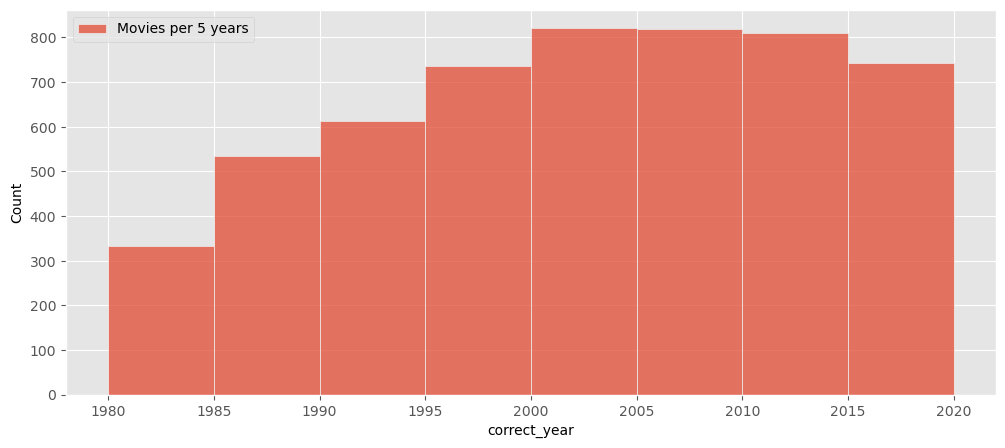

In [283]:
#number of movies produced per year
sns.histplot(x=df['correct_year'], label = 'Movies per 5 years', binwidth=5)
plt.legend()
plt.gcf().set_size_inches(12, 5)

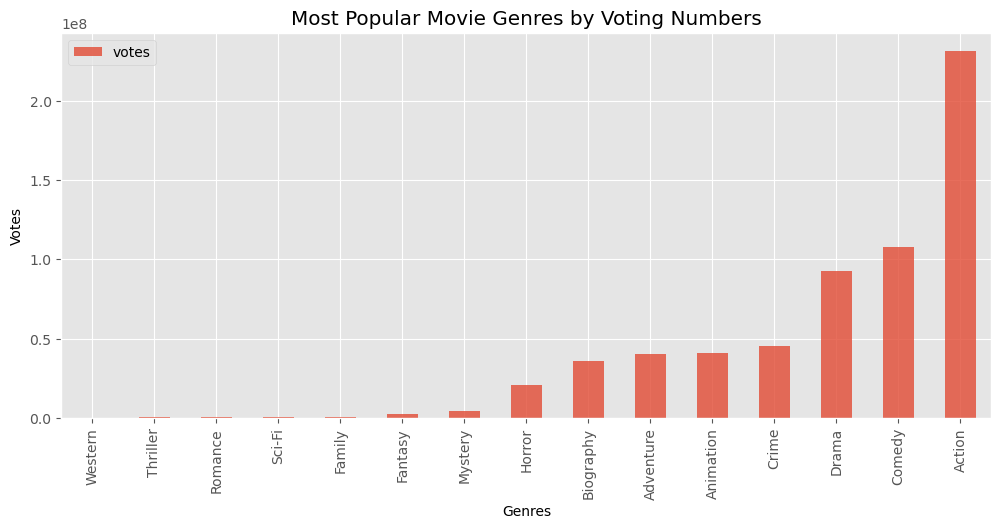

In [284]:
#most popular genre by votes
ax = df[['genre','votes']].groupby(['genre']).sum().sort_values(by=['votes'], ascending=True)\
        .plot(kind='bar', alpha=0.8, title = 'Most Popular Movie Genres by Voting Numbers')

ax.set_xlabel('Genres')
ax.set_ylabel('Votes')

plt.gcf().set_size_inches(12, 5)

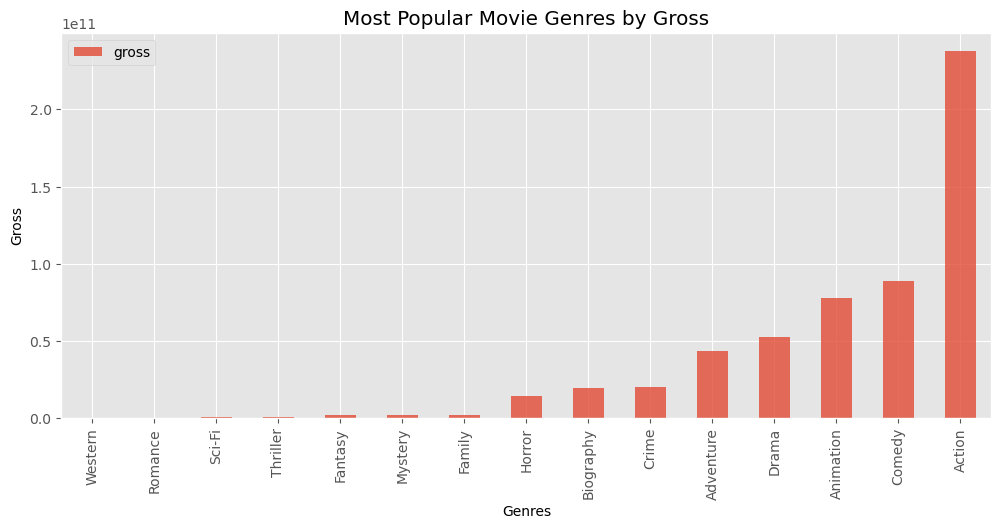

In [285]:
#most popular genre by gross
ax = df[['genre','gross']].groupby(['genre']).sum().sort_values(by=['gross'], ascending=True)\
        .plot(kind='bar', alpha=0.8, title = 'Most Popular Movie Genres by Gross')

ax.set_xlabel('Genres')
ax.set_ylabel('Gross')

plt.gcf().set_size_inches(12, 5)

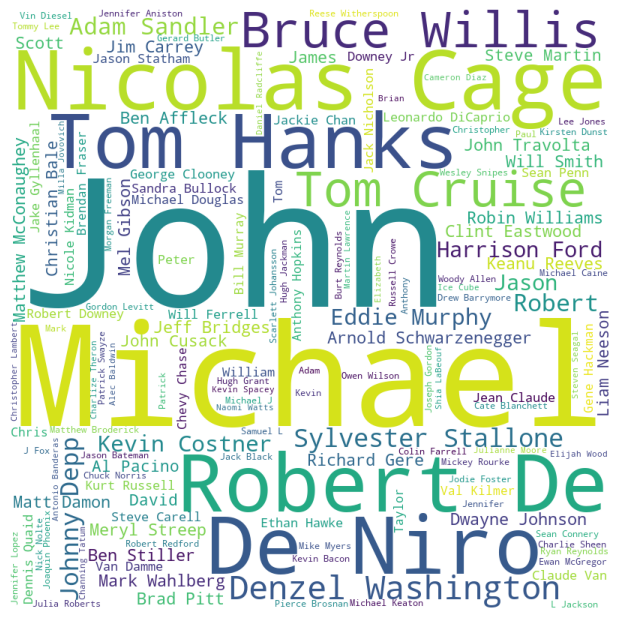

In [286]:
#casting rate of actors
stopword = STOPWORDS
wordcloud =  WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopword,
                min_font_size = 10).generate(' '.join(df['star']))

# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

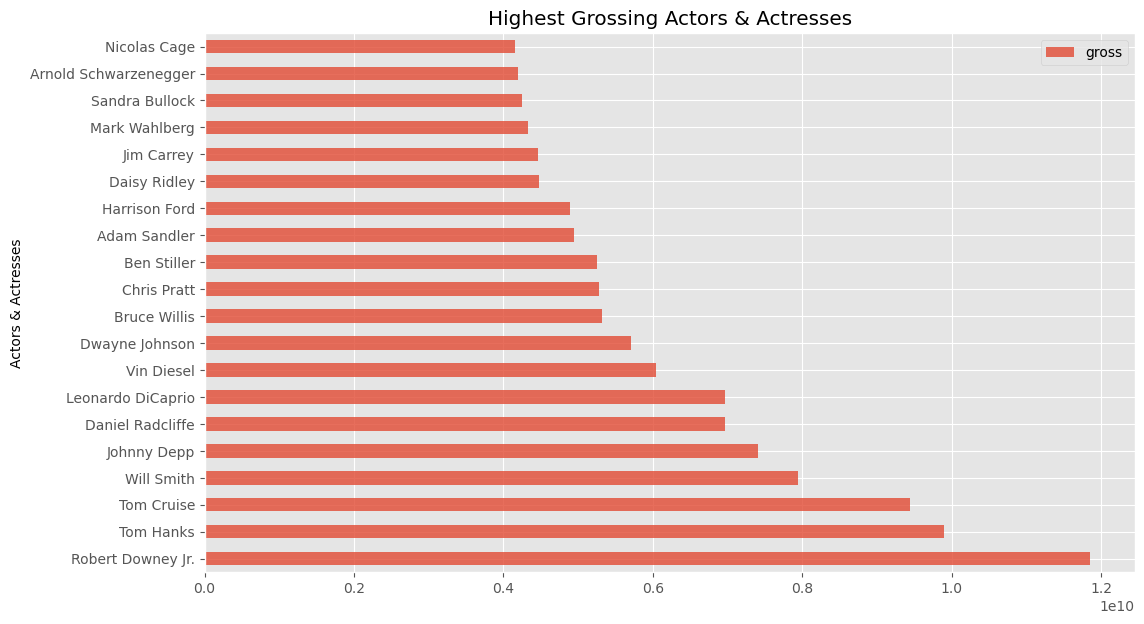

In [287]:
#highest grossing actors and actoresses
ax = df[['star','gross']].groupby('star').sum().sort_values(by=['gross'], ascending=False).head(20)\
        .plot(kind='barh', title='Highest Grossing Actors & Actresses', alpha=0.8)
ax.set_ylabel('Actors & Actresses')
plt.gcf().set_size_inches(12,7)

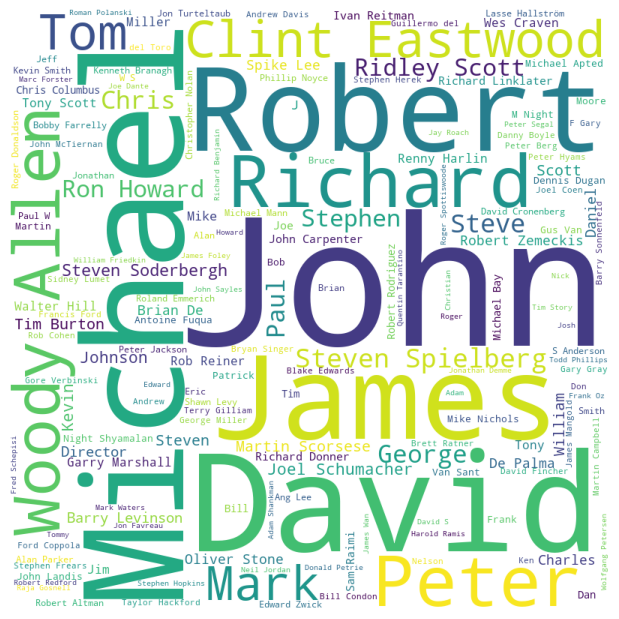

In [288]:
#directors who made most number of movies
stopword = STOPWORDS
wordcloud =  WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopword,
                min_font_size = 10).generate(' '.join(df['director']))

# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

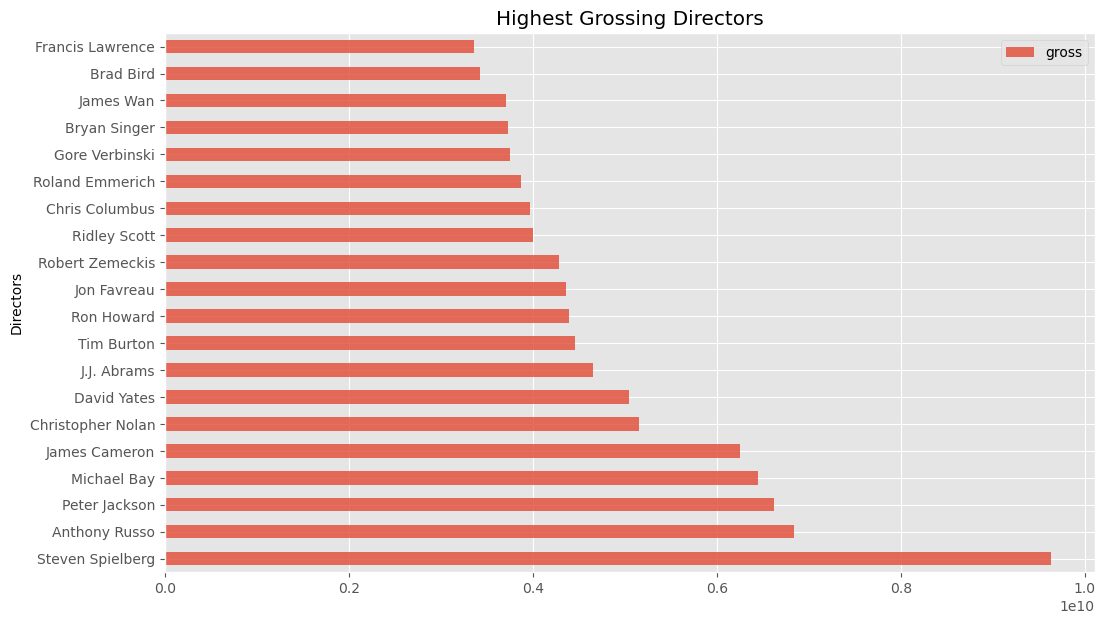

In [289]:
#Highest Grossing Directors
ax = df[['director','gross']].groupby('director').sum().sort_values(by=['gross'], ascending=False).head(20)\
        .plot(kind='barh', title='Highest Grossing Directors', alpha=0.8)
ax.set_ylabel('Directors')
plt.gcf().set_size_inches(12,7)

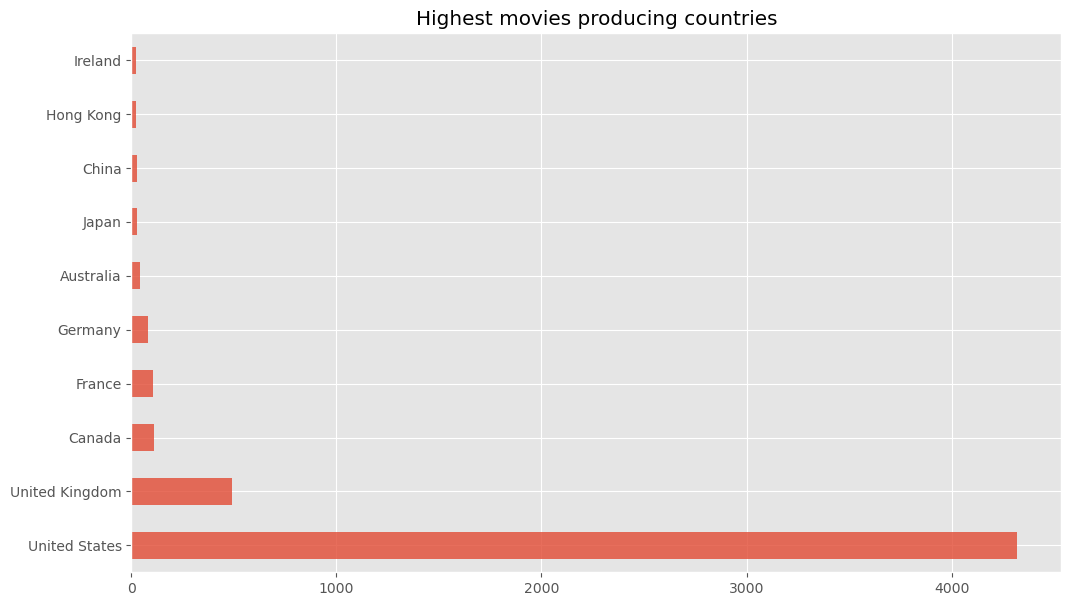

In [290]:
#countries that produce the highest no of movies
df['country'].value_counts().head(10).plot(kind='barh', title='Highest movies producing countries', alpha=0.8)
plt.gcf().set_size_inches(12,7)

In [291]:
#runtime of movies
df['runtime'].mean()

108.15273934698395